In [118]:
import numpy as np
import os
import matplotlib.pyplot as plot
from sklearn import datasets
import math
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [119]:
dataset = pd.read_csv('triangles.csv')
equilaters1 = []
equilaters2 = []
isosceles1 = []
isosceles2 = []
i = 0
for equilater in dataset.Equilater_notIsosceles :
    if equilater == 1 :
        equilaters1.append(dataset.Angle1[i])
        equilaters2.append(dataset.Angle2[i])
    else :
        isosceles1.append(dataset.Angle1[i])
        isosceles2.append(dataset.Angle2[i])
    i += 1
X_1 = dataset.Angle1.to_numpy()
X_1_norm = [(i-min(X_1))/(max(X_1)-min(X_1)) for i in X_1]
X_2 = dataset.Angle2.to_numpy()
X_2_norm = [(i-min(X_2))/(max(X_2)-min(X_2)) for i in X_2]
X = np.column_stack((X_1_norm, X_2_norm))
equilaters1_norm = []
equilaters2_norm = []
isosceles1_norm = []
isosceles2_norm = []
i = 0
for equilater in dataset.Equilater_notIsosceles :
    if equilater == 1 :
        equilaters1_norm.append(X_1_norm[i])
        equilaters2_norm.append(X_2_norm[i])
    else :
        isosceles1_norm.append(X_1_norm[i])
        isosceles2_norm.append(X_2_norm[i])
    i += 1

In [120]:
def decision_boundary(theta, X):
    return -(theta[1]/theta[2])*X - (theta[0]/theta[2])

In [121]:
def plot_data(equilaters1, equilaters2, isosceles1, isosceles2, theta, X):
    if theta is not None :
        plot.plot(X, decision_boundary(theta, X), color='green', linewidth=1, label="Decision boundary")
    plot.scatter(equilaters1, equilaters2, label='Equilàters')
    plot.scatter(isosceles1, isosceles2, label='Isòsceles')
    plot.title('Distribució de triangles en l''espai de features')
    plot.xlabel('Angle 1')
    plot.ylabel('Angle 2')
    plot.legend()
    plot.show()

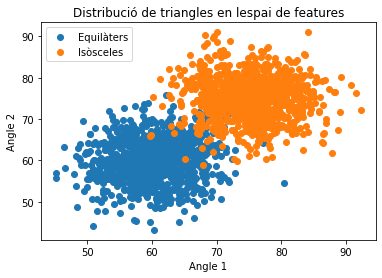

In [122]:
plot_data(equilaters1, equilaters2, isosceles1, isosceles2, None, X)

In [123]:
def hypothesis(theta, x):
    return 1/(1 + np.exp(-np.dot(theta, x.T)))


In [124]:
def loss_function(theta, X, y):
    m = y.shape[0]
    y_T = y.T
    h_x = hypothesis(theta, X)
    return (-1/m)*(np.sum((y_T*np.log10(h_x)) + ((1-y_T)*(np.log10(1-h_x)))))

In [125]:
def gradient_descendent(theta, X, y, learning_rate = 0.2):
    n_variables = theta.shape[0]
    m = y.shape[0]
    part_deriv = (1/m)*np.dot((hypothesis(theta, X) - y).T, X)
    theta = theta - learning_rate * part_deriv.T
    
    return theta

In [126]:
def logistic_regression(X, y, threshold, learning_rate):
    X = np.insert(X, 0, 1.0, axis=1)
    theta = np.zeros((X.shape[1],))
    errors = [0.0, float('inf')]
    
    diff = abs(errors[-1] - errors[-2])
    while (diff > threshold):
        theta = gradient_descendent(theta, X, y, learning_rate=learning_rate)
        error = loss_function(theta, X, y)
        errors.append(error)
        
        if errors[-1] == float('inf') or errors[-2] == float('inf'):
            diff = float('inf')
        else:
            diff = abs(errors[-1] - errors[-2])
    return theta, errors
                

In [127]:
percentage = (np.size(X) // (100 * 2)) * 70;
theta, errors = logistic_regression(X[:percentage], dataset.Equilater_notIsosceles.to_numpy()[:percentage], 1e-7, 0.8)

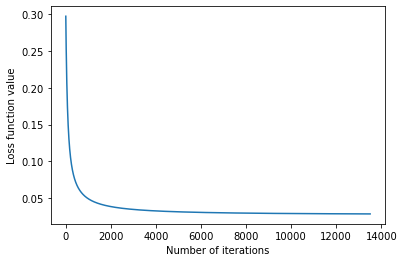

In [128]:
def plot_loss_evolution(errors):
    plot.plot(errors[2:])
    plot.xlabel("Number of iterations")
    plot.ylabel("Loss function value")
    plot.show()
    
_X = np.insert(X, 0, 1.0, axis=1)
plot_loss_evolution(errors)

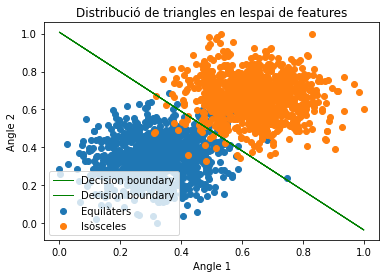

In [129]:
plot_data(equilaters1_norm, equilaters2_norm, isosceles1_norm, isosceles2_norm, theta, X)

In [130]:
reg = LogisticRegression().fit(X[:percentage], dataset.Equilater_notIsosceles.to_numpy()[:percentage])
print("Learned hypothesis: h(x)", end="")
print(str(reg.coef_[0][1])+" Angle1", end = " + ")
print(str(reg.coef_[0][1])+" Angle2", end = " + ")
print(reg.intercept_[0])
theta = reg.coef_[0]
theta = np.insert(theta,0,reg.intercept_)
_X = np.insert(X[:percentage], 0, 1.0, axis = 1)
error = loss_function(theta, _X, dataset.Equilater_notIsosceles.to_numpy()[:percentage])
print("Error after regression: ", error)

Learned hypothesis: h(x)-9.321420919485478 Angle1 + -9.321420919485478 Angle2 + 9.37497325202275
Error after regression:  0.05028724491105559
